In [10]:
import pandas as pd

In [5]:
q=pd.read_csv('/content/language.csv')

In [9]:
import plotly.express as px 
fig0 = px.scatter_mapbox(q, lat="Latitude", lon="Longitude", hover_name="Name", hover_data=["classification_glottolog"], color_discrete_sequence=["maroon"], zoom=1, height=1000)
fig0 = px.scatter_mapbox(q, lat="Latitude", lon="Longitude", hover_name="Name", hover_data=["Family"], color_discrete_sequence=["blue"], zoom=1, height=1000)

fig0.update_layout(mapbox_style="open-street-map")

fig0.show()

In [30]:
sim=pd.read_csv('/content/similarities_1.0.csv')
sim

,ISO_1,LangName_1,ISO_2,LangName_2,Similarity,Robustness
0,abe,Western Abnaki,afr,Afrikaans,0.177,Low
1,abe,Western Abnaki,arb,Standard Arabic,0.094,Low
2,abe,Western Abnaki,bam,Bambara,0.522,Low
3,abe,Western Abnaki,bel,Belarusian,0.194,Low
4,abe,Western Abnaki,ben,Bengali,0.107,Low
...,...,...,...,...,...,...
23344,yua,Yucateco,zul,Zulu,0.120,Low
23345,yue,Yue Chinese,zho,Chinese,1.753,Medium
23346,yue,Yue Chinese,zsm,Standard Malay,0.017,Medium
23347,zho,Chinese,zul,Zulu,0.016,High


In [40]:
idx = sorted(set(sim1['LangName_1']).union(sim1['LangName_2']))

# reshape
matrix=(sim1.pivot(index='LangName_1', columns='LangName_2', values='Similarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

In [57]:
matrix.to_csv('langdistancematrix.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:625: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



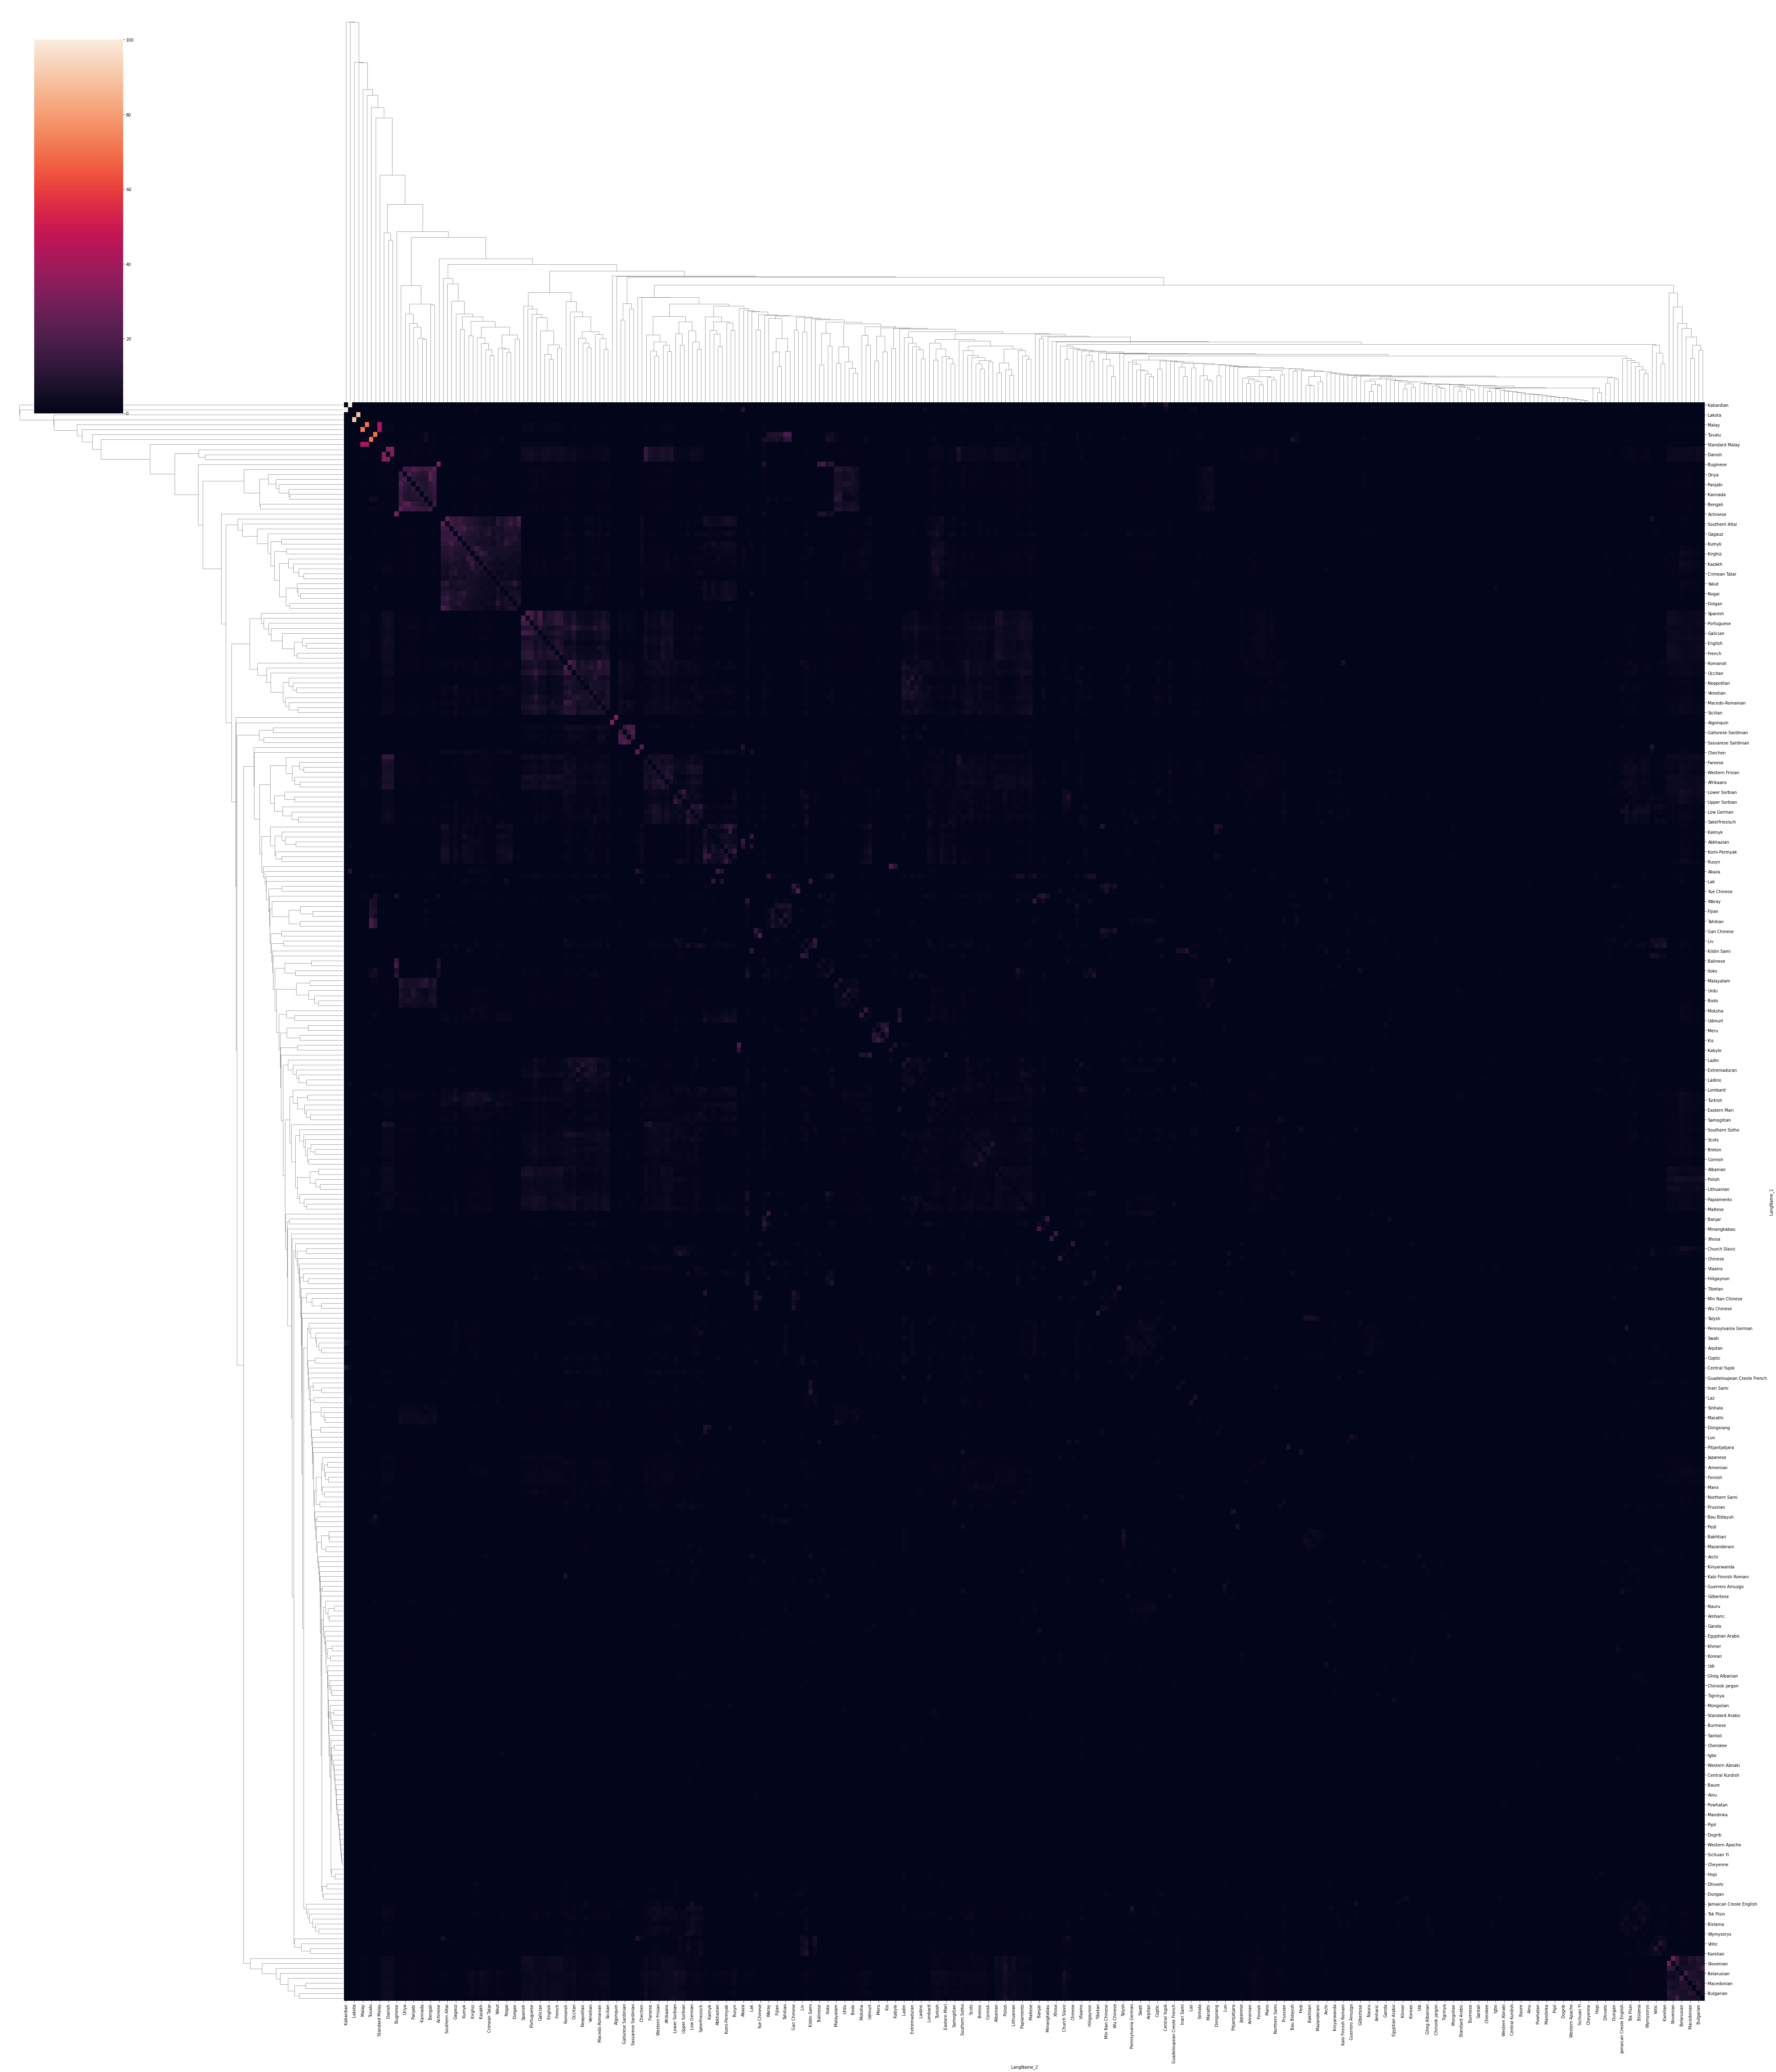

In [56]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 

# Default plot
sns.clustermap(matrix,figsize=(60, 70))

# Show the graph
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



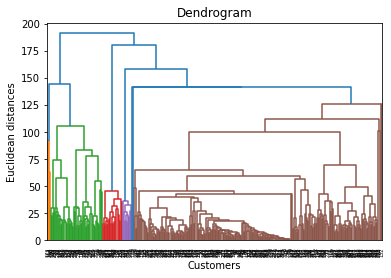

In [60]:
import scipy.cluster.hierarchy as sch # importing scipy.cluster.hierarchy for dendrogram
dendrogram = sch.dendrogram(sch.linkage(matrix, method = 'ward')) # finding the optimal number of clusters using dendrogram
plt.title('Dendrogram') # title of the dendrogram
plt.xlabel('Customers') # label of the x-axis
plt.ylabel('Euclidean distances') # label of the y-axis
plt.show()